In [19]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame
from ipywidgets import interact,fixed
import pandas as pd
from mpl_toolkits import mplot3d
from matplotlib.patches import FancyArrowPatch,Rectangle,Circle
from mpl_toolkits.mplot3d import art3d

plt.rcParams["figure.figsize"] = [10, 10]

from numpy.linalg import norm
from numpy import cos,sin,tan,arctan,exp,log,pi,sqrt,linspace,array,arange,meshgrid

from scipy.integrate import quad,dblquad

$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\bv}[1]{\begin{bmatrix} #1 \end{bmatrix}}$
$\renewcommand{\vec}{\mathbf}$


# One-minute Review

Compute the following line integral. 
 $$\int_C \left(x y e^{-x y}-e^{-x y}\right)\,dx + x^2 e^{-x y}\,dy$$ where $C$ is oriented curve below. 

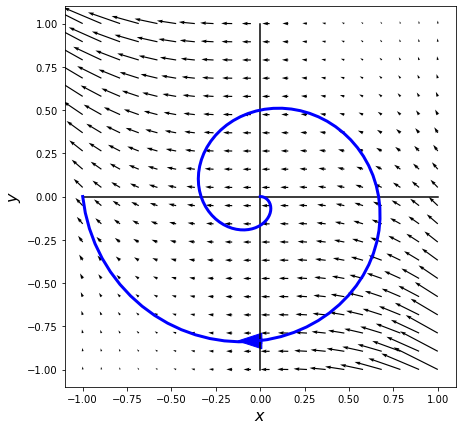

In [12]:
x = y = np.linspace(-1,1,20)
x,y = np.meshgrid(x,y)
plt.figure(figsize=(7,7))
plt.quiver(x,y,x*y*exp(-x*y)-exp(-x*y),exp(-x*y)*x**2);
for c in 'xy':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
    getattr(plt.gca(),f"set_{c}label")(f"${c}$",size=16)
t= np.linspace(0,1,100)    
# plt.plot(2 - (2+sqrt(2))*t,sqrt(2)*t,'r',lw=3);
plt.arrow(0.01,-.835,-.001,0,width=.03,color='b')
plt.plot([0,0],[-1,1],'k')
plt.plot([-1,1],[0,0],'k')
plt.plot((1-t)*cos(t*6*pi/2-pi),(1-t)*sin(t*6*pi/2-pi),'b',lw=3);

# Lecture 21

  - Objectives
    - Green's Theorem
      - Know the statement.
      - Know the ingredients.
      - Scalar curl
      - Divergence in 2D

  - Resources
    - Content
      - Stewart: §16.5
      - New Strang:  
        - [§6.4](https://openstax.org/books/calculus-volume-3/pages/6-4-greens-theorem)
      - [Slides](https://hub.columbiajupyter2.org/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2Fdrewyoungren%2Fmvc-f19&urlpath=tree%2Fmvc-f19%2Fslides%2Fmvc-L21.ipynb) via JupyterHub
    - Practice
      - Mooculus: [Green's Theorem](https://ximera.osu.edu/mooculus/calculus3/greensTheorem/titlePage)
    - Extras 
      - CalcBLUE: [Green's](https://www.youtube.com/watch?v=AUriw3-RoBo&list=PL8erL0pXF3JYCn8Xukv0DqVIXtXJbOqdo&index=37) 

Generally, $\int_C \vec F\cdot d\vec r$ computes the "flow of $\vec F$ along $C$". In the event that $C$ encloses a region $\mathcal{D}$ (we say $C=\partial D$), we have a powerful theorem:

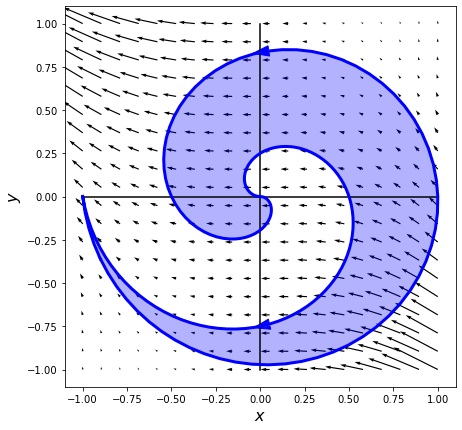

In [13]:
x = y = np.linspace(-1,1,20)
x,y = np.meshgrid(x,y)
plt.figure(figsize=(7,7))
plt.quiver(x,y,x*y*exp(-x*y)-exp(-x*y),exp(-x*y)*x**2);
for c in 'xy':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
    getattr(plt.gca(),f"set_{c}label")(f"${c}$",size=16)
t= np.linspace(0,1,100)    
# plt.plot(2 - (2+sqrt(2))*t,sqrt(2)*t,'r',lw=3);
plt.plot([0,0],[-1,1],'k')
plt.plot([-1,1],[0,0],'k')
xs = np.concatenate(((1-t)*cos(t*4*pi/2-pi),(1+2/3*sin(pi*t)**2)*(t)*cos((1-t)*6*pi/2-pi)))
ys = np.concatenate(((1-t)*sin(t*4*pi/2-pi),(1+2/3*sin(pi*t)**2)*(t)*sin((1-t)*6*pi/2-pi)))
for ti in (25,150):
    plt.arrow(xs[ti],ys[ti],-(xs[ti+1]-xs[ti-1])/2,-(ys[ti+1]-ys[ti-1])/2,width=.02,color='b',length_includes_head=True)
plt.fill(xs,ys,'b',lw=3,alpha=.3);
plt.plot(xs,ys,'b',lw=3,alpha=1);

# plt.plot((1-t)*cos(t*4*pi/2-pi),(1-t)*sin(t*4*pi/2-pi),'b',lw=3);
# plt.plot((1-t)*cos(t*6*pi/2-pi),(1-t)*sin(t*6*pi/2-pi),'b',lw=3);

# Green's Theorem

$$\oint_{\partial D} P\,dx + Q\,dy = \iint_\mathcal{D} \left(\frac{\partial Q}{\partial x} - \frac{\partial P}{\partial y} \right)\,dA$$ 

where: 

  - $D$ is a (simply connected) region in the plane,

  - $\partial D$ is an counterclockwise-oriented, simple, closed curve forming the boundary of $\mathcal D$, and

  - $\vec F(x,y) =  \langle P(x,y),Q(x,y) \rangle$ is a continuously differentiable vector field. 

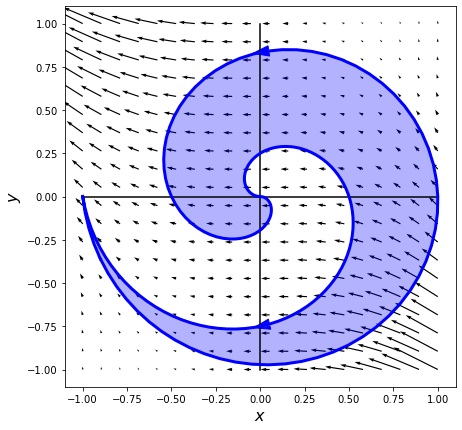

In [13]:
x = y = np.linspace(-1,1,20)
x,y = np.meshgrid(x,y)
plt.figure(figsize=(7,7))
plt.quiver(x,y,x*y*exp(-x*y)-exp(-x*y),exp(-x*y)*x**2);
for c in 'xy':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
    getattr(plt.gca(),f"set_{c}label")(f"${c}$",size=16)
t= np.linspace(0,1,100)    
# plt.plot(2 - (2+sqrt(2))*t,sqrt(2)*t,'r',lw=3);
plt.plot([0,0],[-1,1],'k')
plt.plot([-1,1],[0,0],'k')
xs = np.concatenate(((1-t)*cos(t*4*pi/2-pi),(1+2/3*sin(pi*t)**2)*(t)*cos((1-t)*6*pi/2-pi)))
ys = np.concatenate(((1-t)*sin(t*4*pi/2-pi),(1+2/3*sin(pi*t)**2)*(t)*sin((1-t)*6*pi/2-pi)))
for ti in (25,150):
    plt.arrow(xs[ti],ys[ti],-(xs[ti+1]-xs[ti-1])/2,-(ys[ti+1]-ys[ti-1])/2,width=.02,color='b',length_includes_head=True)
plt.fill(xs,ys,'b',lw=3,alpha=.3);
plt.plot(xs,ys,'b',lw=3,alpha=1);

# plt.plot((1-t)*cos(t*4*pi/2-pi),(1-t)*sin(t*4*pi/2-pi),'b',lw=3);
# plt.plot((1-t)*cos(t*6*pi/2-pi),(1-t)*sin(t*6*pi/2-pi),'b',lw=3);

### Justification

It is sufficient to show the two identities

$$\oint_C P\,dx = \iint_\mathcal D -\partial_y P \,dA$$

$$\oint_C Q\,dy = \iint_\mathcal D \partial_x Q \,dA$$

Consider only the first case and that $\mathcal D$ is the region 
\begin{align*}
g(x) &\leq  y \leq f(x) \\
a &\leq  x \leq b \\
\end{align*}

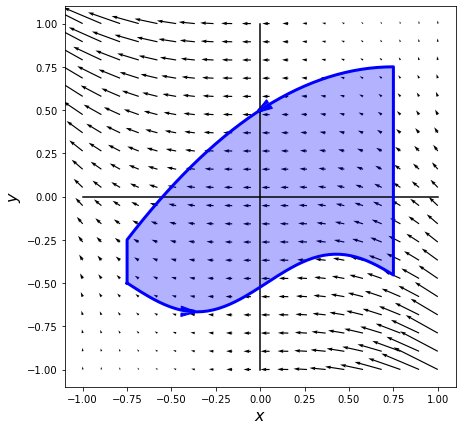

In [14]:
x = y = np.linspace(-1,1,20)
x,y = np.meshgrid(x,y)
plt.figure(figsize=(7,7))
plt.quiver(x,y,x*y*exp(-x*y)-exp(-x*y),exp(-x*y)*x**2);
for c in 'xy':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
    getattr(plt.gca(),f"set_{c}label")(f"${c}$",size=16)
t= np.linspace(0,1,100)    
# plt.plot(2 - (2+sqrt(2))*t,sqrt(2)*t,'r',lw=3);
plt.plot([0,0],[-1,1],'k')
plt.plot([-1,1],[0,0],'k')
xs = np.concatenate((t*3/2 - 3/4,(1-t)*3/2 - 3/4,[-.75]))
ys = np.concatenate((0*t - sin(6*t)*1/6 - 1/2,0*t + 3/4 - t**2,[-1/2]))
for ti in (25,150):
    plt.arrow(xs[ti],ys[ti],(xs[ti+1]-xs[ti-1])/2,(ys[ti+1]-ys[ti-1])/2,width=.02,color='b',length_includes_head=True)
plt.fill(xs,ys,'b',lw=3,alpha=.3);
plt.plot(xs,ys,'b',lw=3,alpha=1);

# plt.plot((1-t)*cos(t*4*pi/2-pi),(1-t)*sin(t*4*pi/2-pi),'b',lw=3);
# plt.plot((1-t)*cos(t*6*pi/2-pi),(1-t)*sin(t*6*pi/2-pi),'b',lw=3);